Cameron Selci, 202046538

In [1319]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from IPython.display import HTML

def side_by_side(*dfs):
    html = '<div style="display:flex">'
    for df in dfs:
        html += '<div style="margin-right: 2em">'
        html += df.to_html()
        html += '</div>'
    html += '</div>'
    display(HTML(html))

USING https://python.plainenglish.io/displaying-multiple-dataframes-side-by-side-in-jupyter-lab-notebook-9a4649a4940 FOR SIDE_BY_SIDE METHOD TO BETTER VISUALIZE AND DISPLAY INFORMATION BECAUSE OF FLOAT "ERROR" THAT IS OCCURING

Author: Liu Zuo Lin,
Nov 22, 2022,
Displaying Multiple DataFrames Side By Side in Jupyter Lab/Notebook,
Published in Python in Plain English,
https://python.plainenglish.io/displaying-multiple-dataframes-side-by-side-in-jupyter-lab-notebook-9a4649a4940


In [1320]:
df = pd.read_csv('plastic-production.csv')
df2 = pd.read_csv('river-plastics.csv')

In [1321]:
df

,Applications,Time,Value
0,Other,1990,19.433
1,Other,1991,20.160
2,Other,1992,21.440
3,Other,1993,22.333
4,Other,1994,24.513
...,...,...,...
415,Total,2015,412.751
416,Total,2016,419.970
417,Total,2017,432.184
418,Total,2018,446.200


In [1322]:
dfTime = df[~df['Applications'].str.contains('Total')]
dfTotal = df[df['Applications'].str.contains('Total')]

In [1323]:
dfTime = dfTime.groupby('Time').sum('Value')
dfTotal = dfTotal.groupby('Time').sum('Value')
side_by_side(dfTime,dfTotal)

,Value
Time,
1990,129.889
1991,134.870
1992,143.570
1993,149.685
1994,164.447
1995,170.918
1996,183.439
1997,197.228
1998,206.397


In [1324]:
dfCheck = (dfTime - dfTotal).abs()
side_by_side(dfTime,dfCheck,dfTotal)

,Value
Time,
1990,129.889
1991,134.870
1992,143.570
1993,149.685
1994,164.447
1995,170.918
1996,183.439
1997,197.228
1998,206.397


In [1325]:
side_by_side(dfTime,dfCheck.round(3),dfTotal)

,Value
Time,
1990,129.889
1991,134.870
1992,143.570
1993,149.685
1994,164.447
1995,170.918
1996,183.439
1997,197.228
1998,206.397


In [1326]:
dfTotal = df[df['Applications'].str.contains('Total')]
dfBC = df[df['Applications'].str.contains('Building & construction')]
dfPack = df[df['Applications'].str.contains('Packaging')]
dfOther = df[df['Applications'].str.contains('Other')]

In [1327]:
dfRest = df[~df.isin(pd.concat([dfTotal, dfBC,dfPack,dfOther]))]
dfRest = dfRest.dropna()
dfRest

,Applications,Time,Value
60,Consumer & institutional Products,1990.0,13.770
61,Consumer & institutional Products,1991.0,14.277
62,Consumer & institutional Products,1992.0,15.177
63,Consumer & institutional Products,1993.0,15.801
64,Consumer & institutional Products,1994.0,17.336
...,...,...,...
385,Transportation - tyres,2015.0,7.100
386,Transportation - tyres,2016.0,7.164
387,Transportation - tyres,2017.0,7.300
388,Transportation - tyres,2018.0,7.522


<Figure size 640x480 with 0 Axes>

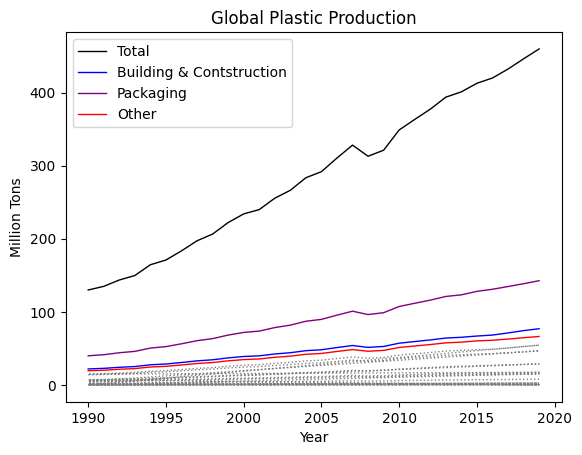

<Figure size 640x480 with 0 Axes>

In [1328]:
plt.plot(dfTotal['Time'],dfTotal['Value'], label = "Total", color="0",linewidth=1)
plt.plot(dfBC['Time'],dfBC['Value'], label = "Building & Contstruction", color='blue',linewidth=1)
plt.plot(dfPack['Time'],dfPack['Value'], label = "Packaging", color='purple',linewidth=1)
plt.plot(dfOther['Time'],dfOther['Value'], label = "Other", color='red',linewidth=1)
plt.plot(dfRest['Time'],dfRest['Value'],  color='grey',linewidth=1,linestyle=':')

plt.ylabel('Million Tons')
plt.xlabel('Year')
plt.title('Global Plastic Production')
plt.legend(loc='upper left')

##plt.tight_layout
plt.figure()

In [1329]:
df2

,Country or administrative area,Area,Coast length,Rainfall,MPW,ME,Ratio ME/MPW
0,Albania,28486,362,1117,69833,1565,2.24
1,Algeria,2316559,998,80,764578,5774,0.76
2,Angola,1247357,1600,1025,236946,860,0.36
3,Antigua and Barbuda,443,153,996,627,2,0.29
4,Argentina,2779705,4989,567,465808,4137,0.89
...,...,...,...,...,...,...,...
158,Venezuela,912557,2800,1875,671431,5988,0.89
159,Vietnam,327732,3444,1772,1112790,28221,2.54
160,Western Sahara,266830,111,35,4114,38,0.91
161,Yemen,419900,1906,112,291737,252,0.09


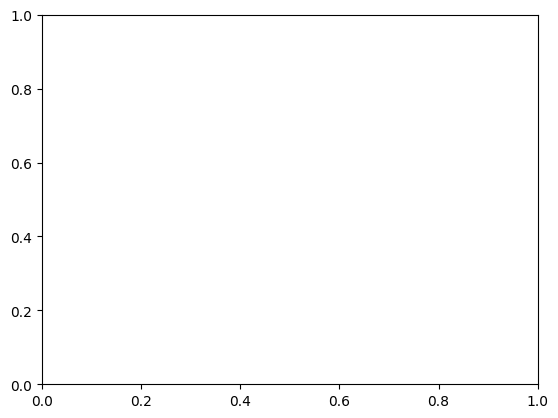

In [1330]:
fig,ax = plt.subplots()

In [1331]:
dfCA = df2
dfCA.insert(1,"Values",(df2['Coast length'] / df2['Area']))
dfCA 


,Country or administrative area,Values,Area,Coast length,Rainfall,MPW,ME,Ratio ME/MPW
0,Albania,0.012708,28486,362,1117,69833,1565,2.24
1,Algeria,0.000431,2316559,998,80,764578,5774,0.76
2,Angola,0.001283,1247357,1600,1025,236946,860,0.36
3,Antigua and Barbuda,0.345372,443,153,996,627,2,0.29
4,Argentina,0.001795,2779705,4989,567,465808,4137,0.89
...,...,...,...,...,...,...,...,...
158,Venezuela,0.003068,912557,2800,1875,671431,5988,0.89
159,Vietnam,0.010509,327732,3444,1772,1112790,28221,2.54
160,Western Sahara,0.000416,266830,111,35,4114,38,0.91
161,Yemen,0.004539,419900,1906,112,291737,252,0.09


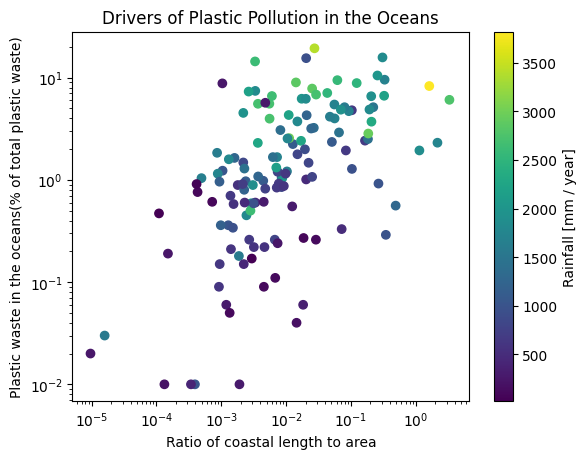

In [1332]:
fig,ax = plt.subplots()

ax.set_ylabel('Plastic waste in the oceans(% of total plastic waste)')
ax.set_xlabel('Ratio of coastal length to area')
ax.set_title('Drivers of Plastic Pollution in the Oceans')
ax.set_xscale('log')
ax.set_yscale('log')

polGraph = fig.colorbar(ax.scatter(dfCA['Values'], df2['Ratio ME/MPW'],c=df2['Rainfall']), ax=ax)
polGraph = polGraph.set_label('Rainfall [mm / year]')

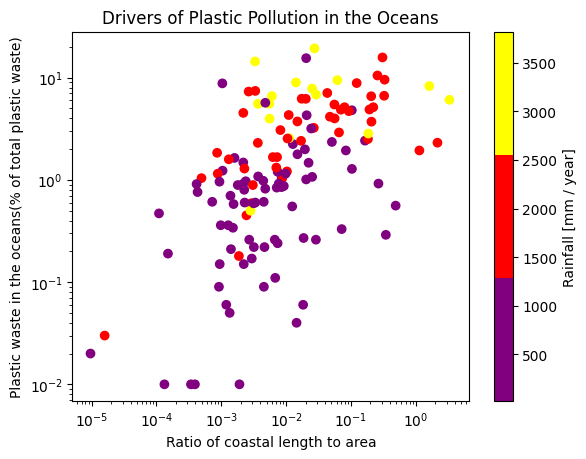

In [1333]:
fig,ax = plt.subplots()

ax.set_ylabel('Plastic waste in the oceans(% of total plastic waste)')
ax.set_xlabel('Ratio of coastal length to area')
ax.set_title('Drivers of Plastic Pollution in the Oceans')
ax.set_xscale('log')
ax.set_yscale('log')
gradientIni = {'purple','yellow','red'}

gradient= clr.ListedColormap(gradientIni)
polGraph = fig.colorbar(ax.scatter(dfCA['Values'], df2['Ratio ME/MPW'],c=df2['Rainfall'],cmap=gradient), ax=ax)
polGraph = polGraph.set_label('Rainfall [mm / year]')

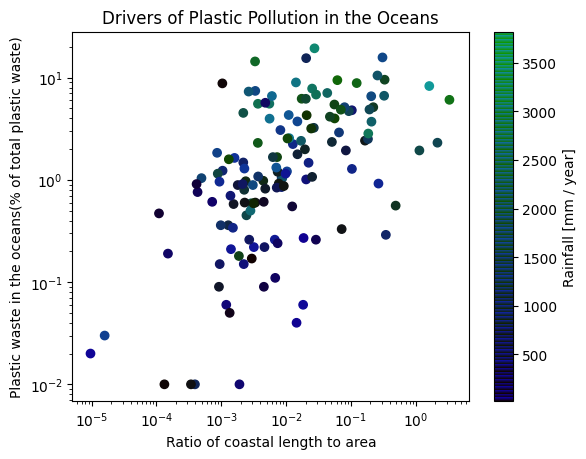

In [1334]:
def colorRange(x = 1, y = 0):
    gradient = []

    for i in range(x):
        gradient.append("#%d"%y)
        if(len(gradient[i]) < 7 ):
            gradient[i] += ("0"*(7-len(gradient[i])))
        y+=1
    return gradient        


fig,ax = plt.subplots()

ax.set_ylabel('Plastic waste in the oceans(% of total plastic waste)')
ax.set_xlabel('Ratio of coastal length to area')
ax.set_title('Drivers of Plastic Pollution in the Oceans')
ax.set_xscale('log')
ax.set_yscale('log')
gradientIni = colorRange(10000,100000) 

gradient= clr.ListedColormap(gradientIni)
polGraph = fig.colorbar(ax.scatter(dfCA['Values'], df2['Ratio ME/MPW'],c=df2['Rainfall'],cmap=gradient), ax=ax)
polGraph = polGraph.set_label('Rainfall [mm / year]')